In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

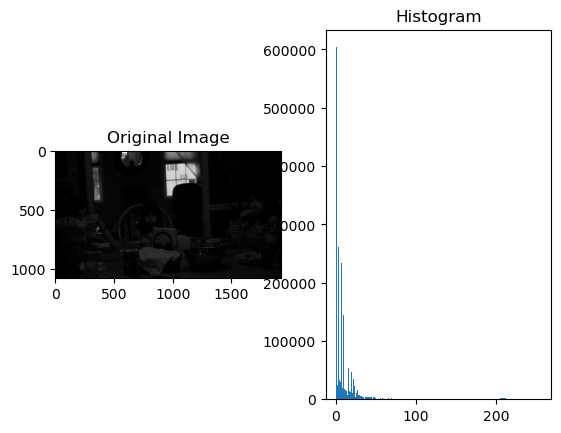

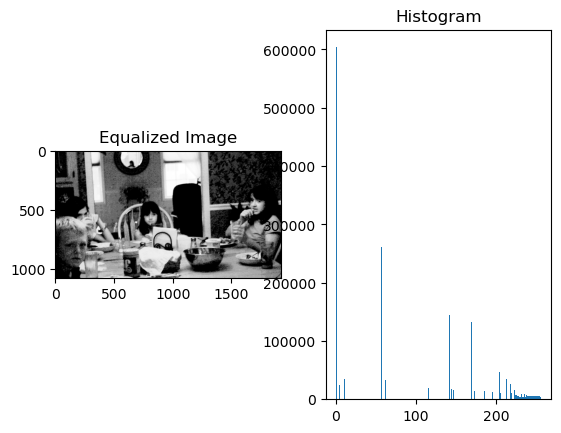

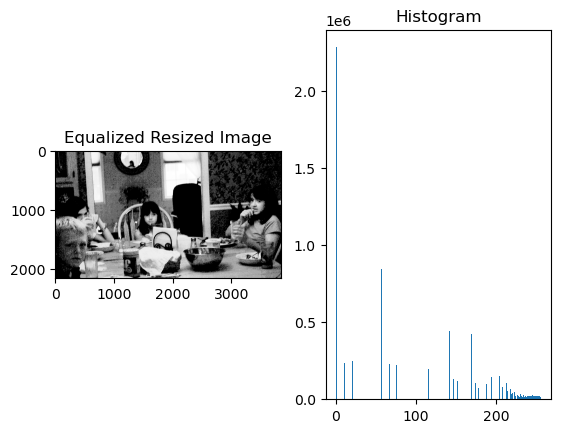

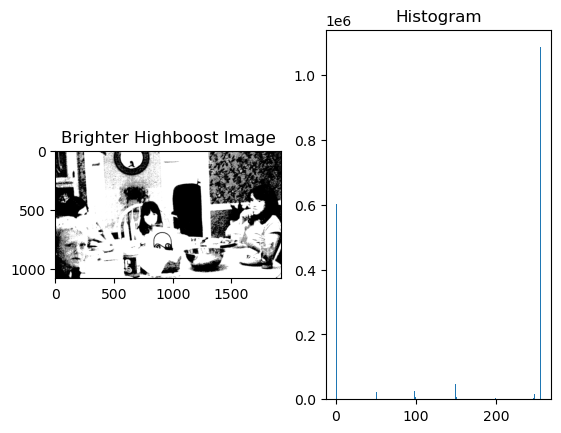

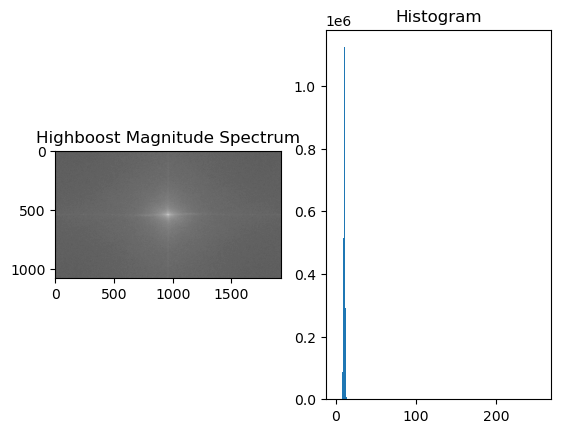

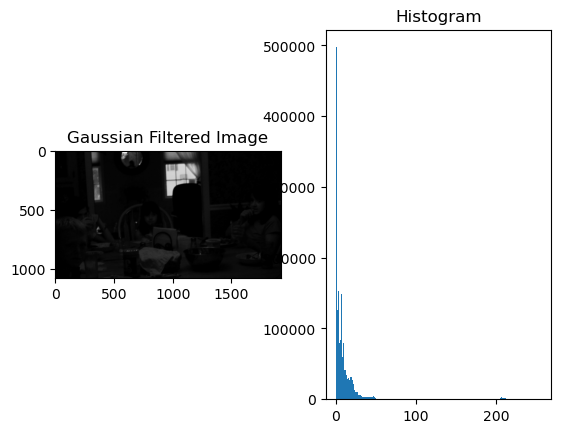

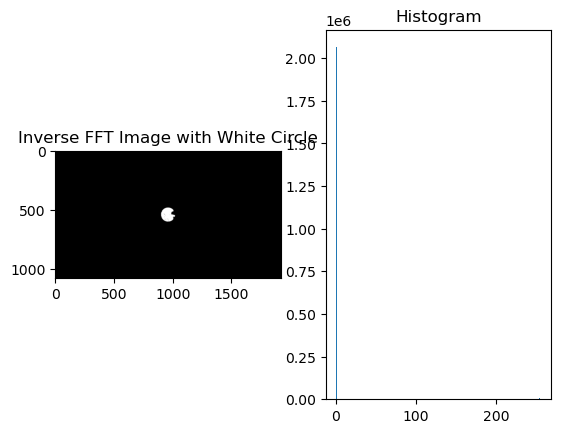

In [190]:
def plot_image_and_histogram(image, title):
    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.title(title)

    plt.subplot(122)
    plt.hist(image.ravel(), 256, [0, 256])
    plt.title("Histogram")

    plt.show()

# 1. Görüntüyü yükleme histogramını çizdirme
original_image = cv2.imread('C:/Users/marzi/Desktop/goruntu3.png', cv2.IMREAD_GRAYSCALE)
plot_image_and_histogram(original_image, 'Original Image')

# 2. Histogram eşitleme uygulama, histogram eşitleme sonrası görüntüyü ve histogramını çizdirme
equalized_image = cv2.equalizeHist(original_image)
plot_image_and_histogram(equalized_image, 'Equalized Image')

# 3. Görüntüye bicubic interpolasyon ile iki kat büyütme, histogram eşitleme ve görüntüyü ve histogramını çizdirme
resized_image = cv2.resize(original_image, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
equalized_resized_image = cv2.equalizeHist(resized_image)
plot_image_and_histogram(equalized_resized_image, 'Equalized Resized Image')

# 4. Görüntüye unsharp masking ve highboost filtering uygulama, görüntüyü ve histogramını çizdirme
kernel_size = 3
blurred_image = cv2.GaussianBlur(original_image, (kernel_size, kernel_size), 0)
alpha = 50.0  
beta = 0.5 
highboost_image = cv2.addWeighted(original_image, alpha, blurred_image, -beta, 0)
plot_image_and_histogram(highboost_image, 'Brighter Highboost Image')

# 5. Highboost sonucunun dft2 sini alma dft2 yi shift etme, görüntüyü ve genlik spektrumunu çizdirme
fft_highboost = np.fft.fft2(highboost_image)
fft_highboost_shifted = np.fft.fftshift(fft_highboost)
magnitude_spectrum_highboost = np.log(np.abs(fft_highboost_shifted) + 1)
plot_image_and_histogram(magnitude_spectrum_highboost, 'Highboost Magnitude Spectrum')

# 6. Görüntüye yarı çapı 200 olan gauss alçak geçiren filtre uygulama gauss filtresini çizdirme
gaussian_filter_size = 200
gaussian_filter_sigma = 1.5
gaussian_filter = cv2.getGaussianKernel(gaussian_filter_size, gaussian_filter_sigma)
gaussian_filtered_image = cv2.filter2D(original_image, -1, gaussian_filter * gaussian_filter.T)
plot_image_and_histogram(gaussian_filtered_image, 'Gaussian Filtered Image')

# 7. Görüntünün ters dft2 sini alıp görüntünün son halini çizdirme
fft_highboost_shifted = np.fft.fftshift(fft_highboost)
inverse_fft_image = np.fft.ifft2(np.fft.ifftshift(fft_highboost_shifted)).real
mask = np.zeros((rows, cols), dtype=np.uint8)
cv2.circle(mask, (ccol, crow), 60, 255, -1)
mask[mask > 0] = 255
inverse_fft_image_masked = inverse_fft_image * mask / 255

inverse_fft_image_masked = inverse_fft_image_masked * 255 / np.max(inverse_fft_image_masked)

plot_image_and_histogram(inverse_fft_image_masked.astype(np.uint8), 'Inverse FFT Image with White Circle')

